# Analyse en Composantes Principales (ACP)

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn
from mlxtend.plotting import plot_pca_correlation_graph

In [64]:
# load dataset
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
# drop Id column
df = df.drop(['Id', ], axis = 1)

In [66]:
# define X & y
X = df.drop(['Species'], axis = 1)
y = df['Species']

In [67]:
# standardizing the features
X_std = StandardScaler().fit_transform(X)

In [68]:
# ACP
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [69]:
# concat principalDf et column "species"
df_final = pd.concat([principalDf, df[['Species']]], axis = 1)
df_final

,principal component 1,principal component 2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


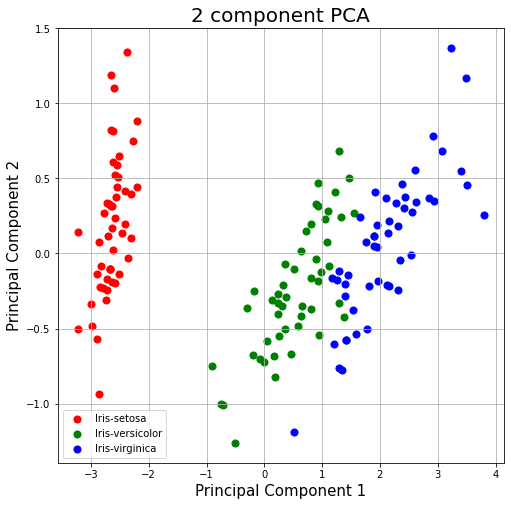

In [70]:
# vizualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_final['Species'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'principal component 1']
               , df_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [71]:
#By using the attribute explained_variance_ratio_
# you can see that the first principal component contains 92% of the variance 
# and the second principal component contains 0,5% of the variance. 
# Together, the two components contain 92,5% of the information.
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

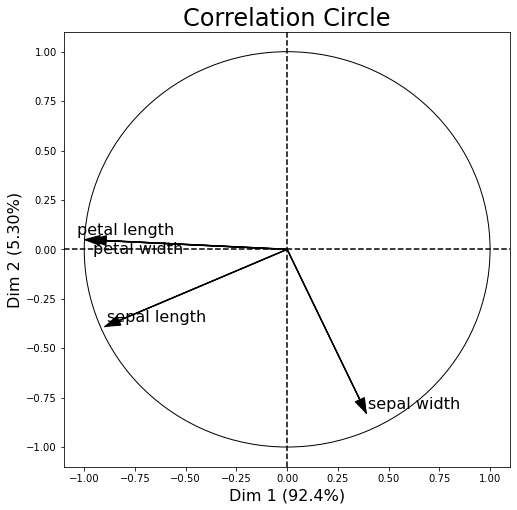

In [84]:
# correlation circle
figure, correlation_matrix = plot_pca_correlation_graph(X,features,dimensions=(1, 2),figure_axis_size=8)